In [2]:
import numpy as np
import matplotlib.pyplot as plt

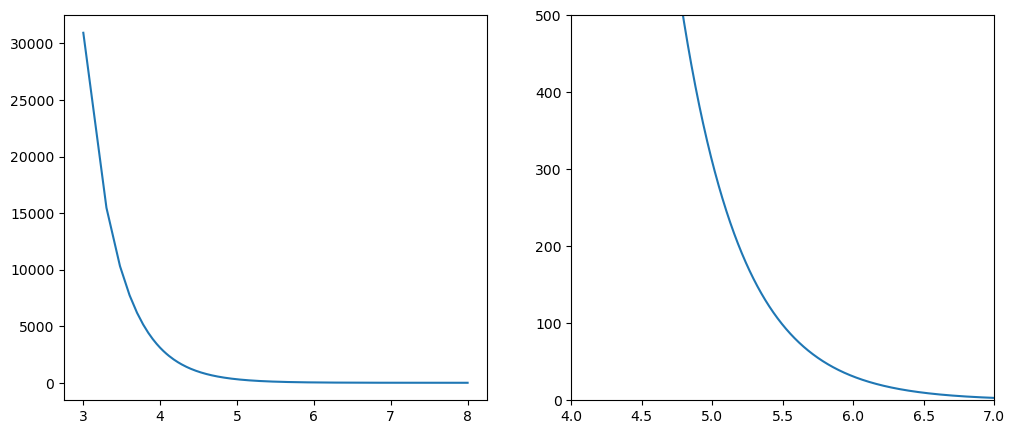

In [3]:
t=10

nWEC=2
rWEC=5


Vol_WEC=nWEC*np.pi*rWEC**3*4/3

Cbase=20*10*6+(Vol_WEC)*1000 #capital cost will scale with WEC volume

CA=0.1 # $/W cost per capacity to construct
DA=2*10**6 # cost to decomission
MA=10*6 # $/yr 

MV=10 # $M/MWhr/yr
r=0.08 # discount rate
hr=8760 # hr/yr
OEE=0.7 # Uptime
P=np.linspace(10**3,10**8,100000)
cap=(Cbase+MA+(MV*np.log10(P)))/(1+r)**(1)
for i in range(t-1):
    cap = cap + ((MA+MV*np.log10(P))/((1+r)**(i+2)))#/(P/(1+r)**(i+1))
    #print(LCOE)

decomish=DA/(1+r)**t
cap=cap+decomish
Pnet=P*t*hr*OEE

LCOE=cap/Pnet


fig,(p1,p2)=plt.subplots(1,2,figsize=(12,5))
p1.plot(np.log10(P),LCOE*10**6)
#p1.set_ylim([0,500])
p2.plot(np.log10(P),LCOE*10**6)
p2.set_xlim([4,7])
p2.set_ylim([0,500])
plt.show()